<a href="https://colab.research.google.com/github/FB-Decipherer/Experiment-1/blob/main/X2_bounding_boxes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install filetype

In [ ]:
import cv2
import numpy as np
import pytesseract
import filetype
from google.colab.patches import cv2_imshow

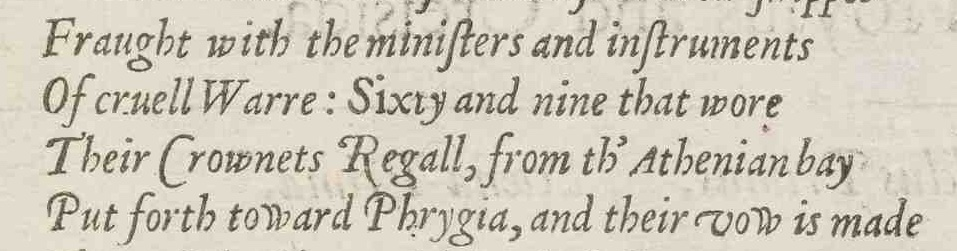

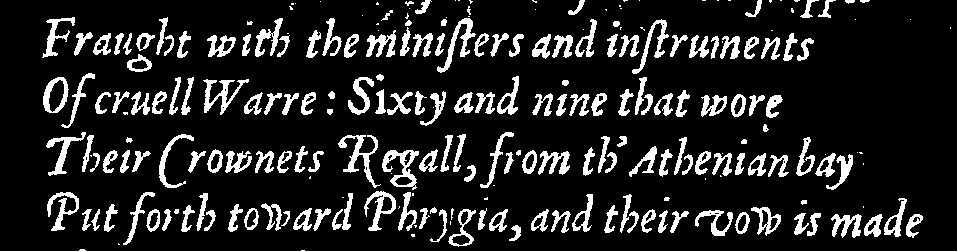

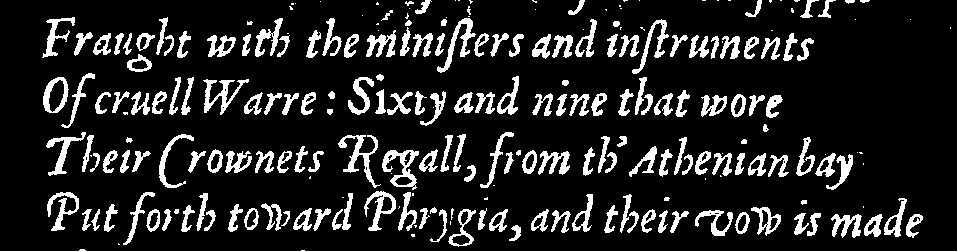

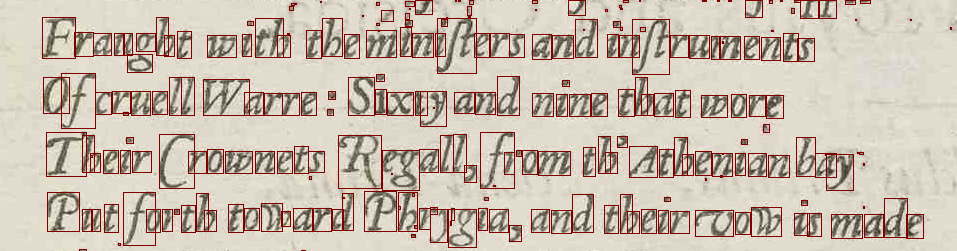

Fraught with the minifters and inftruments

Of cruell Warre : Sixty and nine that wore

Their (rownets Regall, from th Athenian bay
Put forth toward Phrygia, and their vow is made



In [ ]:
def save_bounding_boxes(target_image):

  cv2_imshow(target_image)

  gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)
  bb_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  cv2_imshow(bb_image)

  # Draw bounding boxes
  cnts = cv2.findContours(bb_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]

  # Start coordinate, here (5, 5)
  # represents the top left corner of rectangle
  start_point = (5, 5)
  
  # Ending coordinate, here (220, 220)
  # represents the bottom right corner of rectangle
  end_point = (220, 220)

  color = (0,0,128)
  bb = 0

  for c in cnts:
      x,y,w,h = cv2.boundingRect(c)
      cv2.rectangle(target_image, (x, y), (x + w, y + h), color, 1)
      roi = target_image[y:y+h, x:x+w]

      letters_path = '/content/drive/MyDrive/Templates/TC Letters/'
      letters_file_name = letters_path + str(bb) + '.jpg'
      cv2.imwrite(letters_file_name, roi)
      bb += 1
   

  # OCR
  ocr_text = pytesseract.image_to_string(255 - bb_image, lang='eng',config='--psm 6')

  cv2_imshow(bb_image)
  cv2_imshow(target_image)
  return ocr_text
 
 
target_image = cv2.imread('/content/drive/MyDrive/Template Match/TC 4 sentences target image.jpg')
ocr_text = save_bounding_boxes(target_image)
print(ocr_text)
